# Hodina 2: Historie umělé inteligence

## Obsah hodiny
- Klíčové události ve vývoji AI
- Průkopníci AI
- Turingův test
- Významné milníky
- Vývoj AI od 1950 do současnosti

---

## 1. Prehistorie AI - Sny o umělých bytostech

### Starověké mýty a legendy
- **Starověké Řecko**: Talos - bronzový obr chránící Krétu
- **Židovská mystika**: Golem - hliněná bytost oživená magií
- **Středověk**: Alchymisté a homunculus

### První mechanické automaty
- **1206**: Al-Jazari - programovatelný hudební automat
- **1738**: Jacques de Vaucanson - mechanická kachna
- **1770**: Wolfgang von Kempelen - Turek (šachový automat)

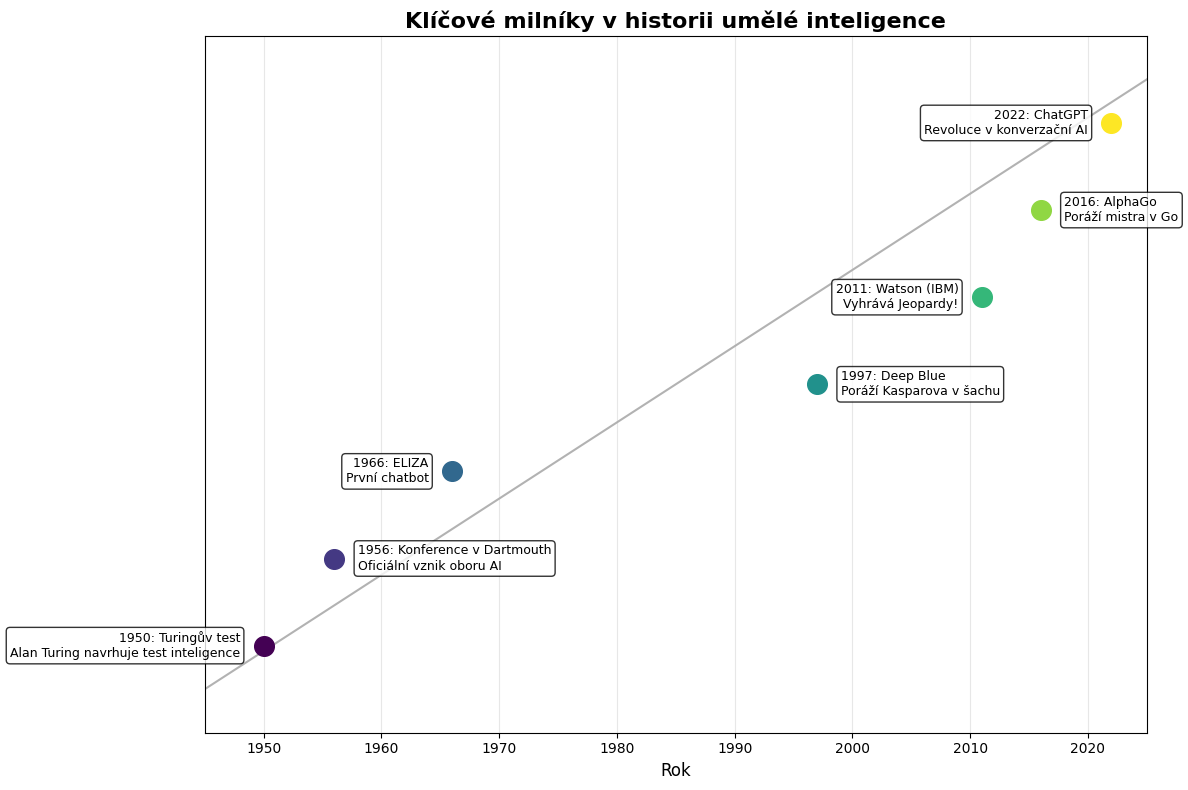

In [1]:
# Vizualizace časové osy historie AI
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Klíčové události v historii AI
events = [
    (1950, "Turingův test", "Alan Turing navrhuje test inteligence"),
    (1956, "Konference v Dartmouth", "Oficiální vznik oboru AI"),
    (1966, "ELIZA", "První chatbot"),
    (1997, "Deep Blue", "Poráží Kasparova v šachu"),
    (2011, "Watson (IBM)", "Vyhrává Jeopardy!"),
    (2016, "AlphaGo", "Poráží mistra v Go"),
    (2022, "ChatGPT", "Revoluce v konverzační AI")
]

# Vytvoření grafu
fig, ax = plt.subplots(figsize=(12, 8))

# Nastavení os
years = [event[0] for event in events]
labels = [event[1] for event in events]
descriptions = [event[2] for event in events]

# Vytvoření časové osy
y_positions = np.arange(len(events))
colors = plt.cm.viridis(np.linspace(0, 1, len(events)))

# Vykreslení bodů
for i, (year, label, desc) in enumerate(events):
    ax.scatter(year, i, s=200, c=[colors[i]], zorder=2)
    
    # Přidání popisků
    if i % 2 == 0:
        ax.text(year - 2, i, f"{year}: {label}\n{desc}", 
                ha='right', va='center', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    else:
        ax.text(year + 2, i, f"{year}: {label}\n{desc}", 
                ha='left', va='center', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Čára časové osy
ax.plot([1945, 2025], [-0.5, len(events)-0.5], 'k-', alpha=0.3, zorder=1)

# Nastavení grafu
ax.set_xlim(1945, 2025)
ax.set_ylim(-1, len(events))
ax.set_xlabel('Rok', fontsize=12)
ax.set_title('Klíčové milníky v historii umělé inteligence', fontsize=16, fontweight='bold')
ax.grid(True, axis='x', alpha=0.3)
ax.set_yticks([])

plt.tight_layout()
plt.show()

## 2. Turingův test (1950)

### Alan Turing - otec moderní informatiky
Alan Turing v roce 1950 publikoval článek "Computing Machinery and Intelligence", kde položil zásadní otázku: **"Mohou stroje myslet?"**

### Princip Turingova testu
Test spočívá v konverzaci mezi:
- **Hodnotitel** (člověk)
- **Účastník A** (člověk)
- **Účastník B** (stroj)

Hodnotitel komunikuje s oběma účastníky pouze textově a snaží se určit, který je člověk a který stroj. Pokud stroj dokáže hodnotitele oklamat, prošel testem.

In [2]:
# Simulace Turingova testu
import random
import time

class TuringTestSimulator:
    def __init__(self):
        self.human_responses = {
            "jak se jmenuješ": ["Jmenuji se Petr.", "Jsem Marie.", "Říkají mi Honza."],
            "kolik je hodin": ["Nemám hodinky, sorry.", "Myslím, že už bude večer.", "Čas letí, když se bavíme!"],
            "jaké je počasí": ["Venku je hezky, svítí sluníčko.", "Prší, raději zůstaň doma.", "Je zataženo, ale teplo."],
            "co máš rád": ["Mám rád pizzu a filmy.", "Miluji knihy a kávu.", "Sport a hudba jsou můj život."]
        }
        
        self.ai_responses = {
            "jak se jmenuješ": ["Jsem AI asistent.", "Nemám jméno, jsem program.", "Můžete mi říkat jak chcete."],
            "kolik je hodin": ["Aktuální čas je 14:32.", "Přesně 14:32:17.", "Podle systémového času je 14:32."],
            "jaké je počasí": ["Nemám přístup k aktuálním meteorologickým datům.", 
                             "Nedokážu určit počasí bez senzorů.",
                             "Pro informace o počasí zkontrolujte místní předpověď."],
            "co máš rád": ["Jako AI nemám preference.", "Nedokážu mít osobní preference.", "Jsem navržen pomáhat, ne mít záliby."]
        }
    
    def get_response(self, question, is_human):
        question = question.lower().strip()
        
        # Simulace času přemýšlení
        if is_human:
            time.sleep(random.uniform(0.5, 2.0))  # Člověk přemýšlí déle
        else:
            time.sleep(random.uniform(0.1, 0.5))  # AI odpovídá rychleji
        
        # Hledání odpovědi
        responses = self.human_responses if is_human else self.ai_responses
        
        for key in responses:
            if key in question:
                return random.choice(responses[key])
        
        # Výchozí odpověď
        if is_human:
            return random.choice(["Hmm, to je zajímavá otázka.", "Na to neumím odpovědět.", "Co tím myslíš?"])
        else:
            return "Omlouvám se, nerozumím vaší otázce. Můžete ji přeformulovat?"

# Ukázka testu
simulator = TuringTestSimulator()

print("=== SIMULACE TURINGOVA TESTU ===")
print("Zkuste poznat, kdo je člověk a kdo AI!\n")

# Náhodně přiřadíme role
participant_a_is_human = random.choice([True, False])
participant_b_is_human = not participant_a_is_human

test_questions = [
    "Jak se jmenuješ?",
    "Jaké je počasí?",
    "Co máš rád?"
]

for question in test_questions:
    print(f"\nOtázka: {question}")
    print(f"Účastník A: {simulator.get_response(question, participant_a_is_human)}")
    print(f"Účastník B: {simulator.get_response(question, participant_b_is_human)}")

print("\n" + "="*40)
print("Který účastník je podle vás člověk? (A nebo B)")
print(f"\nŘešení: Člověk je účastník {'A' if participant_a_is_human else 'B'}")

=== SIMULACE TURINGOVA TESTU ===
Zkuste poznat, kdo je člověk a kdo AI!


Otázka: Jak se jmenuješ?
Účastník A: Říkají mi Honza.
Účastník B: Jsem AI asistent.

Otázka: Jaké je počasí?
Účastník A: Je zataženo, ale teplo.
Účastník B: Nemám přístup k aktuálním meteorologickým datům.

Otázka: Co máš rád?
Účastník A: Mám rád pizzu a filmy.
Účastník B: Jako AI nemám preference.

Který účastník je podle vás člověk? (A nebo B)

Řešení: Člověk je účastník A


## 3. Zlatý věk AI (1956-1974)

### Konference v Dartmouth (1956)
- **Organizátoři**: John McCarthy, Marvin Minsky, Claude Shannon, Nathaniel Rochester
- **Cíl**: "Každý aspekt učení nebo jakýkoli jiný rys inteligence může být v principu tak přesně popsán, že může být vytvořen stroj, který jej simuluje."
- **Výsledek**: Oficiální vznik oboru "Artificial Intelligence"

### Významné projekty této éry:
1. **Logic Theorist** (1956) - první AI program
2. **General Problem Solver** (1957) - univerzální řešitel problémů
3. **LISP** (1958) - programovací jazyk pro AI
4. **ELIZA** (1966) - první chatbot

In [3]:
# Jednoduchá implementace ELIZA - prvního chatbota
import re
import random

class ELIZA:
    def __init__(self):
        self.reflections = {
            "jsem": "jste",
            "byl jsem": "byli jste",
            "já": "vy",
            "mě": "vás",
            "můj": "váš",
            "moje": "vaše",
            "mé": "vaše",
            "vy": "já",
            "váš": "můj",
            "vaše": "moje"
        }
        
        self.patterns = [
            (r'.*cítím se (.*)', ["Proč se cítíte {}?", "Co vás přimělo cítit se {}?"]),
            (r'.*jsem (.*)', ["Jak dlouho jste {}?", "Jak se cítíte, když jste {}?"]),
            (r'.*bojím se (.*)', ["Proč se bojíte {}?", "Co by se stalo, kdybyste se nebál {}?"]),
            (r'.*potřebuji (.*)', ["Proč potřebujete {}?", "Co by se stalo, kdybyste neměl {}?"]),
            (r'.*nemohu (.*)', ["Co vám brání {}?", "Jak byste se cítil, kdybyste mohl {}?"]),
            (r'.*matka|otec|rodina(.*)', ["Řekněte mi více o své rodině.", "Jak se cítíte ohledně své rodiny?"]),
            (r'.*ano(.*)', ["Zdáte se si tím být jistý.", "Proč ano?"]),
            (r'.*ne(.*)', ["Proč ne?", "Jste si jistý?"]),
            (r'(.*)', ["Řekněte mi o tom více.", "Jak se při tom cítíte?", "Proč to říkáte?"])
        ]
    
    def reflect(self, text):
        words = text.lower().split()
        for i, word in enumerate(words):
            if word in self.reflections:
                words[i] = self.reflections[word]
        return ' '.join(words)
    
    def respond(self, text):
        for pattern, responses in self.patterns:
            match = re.match(pattern, text.lower())
            if match:
                response = random.choice(responses)
                if '{}' in response:
                    captured = match.group(1)
                    reflected = self.reflect(captured)
                    return response.format(reflected)
                return response
        return "Zajímavé. Pokračujte prosím."

# Ukázka ELIZA v akci
eliza = ELIZA()

print("=== ELIZA - Váš digitální terapeut (1966) ===")
print("(Toto je ukázka historického chatbota)\n")

# Simulace konverzace
conversation = [
    "Cítím se smutný",
    "Bojím se zkoušek",
    "Potřebuji pomoc",
    "Moje matka mi nerozumí"
]

for user_input in conversation:
    print(f"Pacient: {user_input}")
    print(f"ELIZA: {eliza.respond(user_input)}")
    print()

=== ELIZA - Váš digitální terapeut (1966) ===
(Toto je ukázka historického chatbota)

Pacient: Cítím se smutný
ELIZA: Proč se cítíte smutný?

Pacient: Bojím se zkoušek
ELIZA: Proč se bojíte zkoušek?

Pacient: Potřebuji pomoc
ELIZA: Co by se stalo, kdybyste neměl pomoc?

Pacient: Moje matka mi nerozumí
ELIZA: Řekněte mi více o své rodině.



## 4. První AI zima (1974-1980)

### Důvody zklamání:
- **Přehnané sliby** - AI nedokázala splnit vysoká očekávání
- **Omezený výpočetní výkon** - počítače byly příliš slabé
- **Nedostatek dat** - málo digitálních dat pro učení
- **Kombinatorická exploze** - problémy byly složitější než se zdálo

### Důsledky:
- Drastické snížení financování
- Skepticismus vůči AI
- Mnoho výzkumníků opustilo obor

## 5. Éra expertních systémů (1980-1987)

### Charakteristika:
- Systémy založené na pravidlech
- Napodobování lidských expertů
- Úzce specializované aplikace

### Významné systémy:
1. **MYCIN** - diagnostika bakteriálních infekcí
2. **DENDRAL** - analýza chemických struktur
3. **XCON** - konfigurace počítačových systémů

In [4]:
# Jednoduchý expertní systém pro diagnostiku počítačových problémů
class ExpertniSystemPocitace:
    def __init__(self):
        # Báze znalostí - pravidla IF-THEN
        self.pravidla = [
            {
                "podminky": ["pocitac_se_nezapina", "zadny_zvuk"],
                "zavery": ["problem_napajeni", "zkontrolujte_kabel"],
                "jistota": 0.9
            },
            {
                "podminky": ["pocitac_se_zapina", "obrazovka_cerna"],
                "zavery": ["problem_monitor", "zkontrolujte_kabel_monitoru"],
                "jistota": 0.8
            },
            {
                "podminky": ["pocitac_se_zapina", "pipani"],
                "zavery": ["problem_ram", "zkontrolujte_pamet"],
                "jistota": 0.85
            },
            {
                "podminky": ["pocitac_pomaly", "hodne_programu"],
                "zavery": ["malo_ram", "zavrete_programy"],
                "jistota": 0.7
            },
            {
                "podminky": ["pocitac_pomaly", "stary_pocitac"],
                "zavery": ["zastaraly_hardware", "doporucuji_upgrade"],
                "jistota": 0.75
            }
        ]
        
        self.otazky = {
            "pocitac_se_nezapina": "Zapíná se váš počítač? (ne)",
            "pocitac_se_zapina": "Zapíná se váš počítač? (ano)",
            "zadny_zvuk": "Slyšíte nějaký zvuk při zapnutí? (ne)",
            "pipani": "Slyšíte pípání při zapnutí? (ano)",
            "obrazovka_cerna": "Je obrazovka černá? (ano)",
            "pocitac_pomaly": "Je počítač pomalý? (ano)",
            "hodne_programu": "Máte spuštěno hodně programů? (ano)",
            "stary_pocitac": "Je váš počítač starší než 5 let? (ano)"
        }
    
    def diagnostikuj(self, symptomy):
        mozne_problemy = []
        
        for pravidlo in self.pravidla:
            # Kontrola, zda jsou splněny všechny podmínky
            if all(podminka in symptomy for podminka in pravidlo["podminky"]):
                for zaver in pravidlo["zavery"]:
                    mozne_problemy.append({
                        "problem": zaver,
                        "jistota": pravidlo["jistota"]
                    })
        
        # Seřazení podle jistoty
        mozne_problemy.sort(key=lambda x: x["jistota"], reverse=True)
        return mozne_problemy

# Ukázka expertního systému
expert = ExpertniSystemPocitace()

print("=== EXPERTNÍ SYSTÉM PRO DIAGNOSTIKU POČÍTAČE ===")
print("(Ukázka technologie z 80. let)\n")

# Simulace různých scénářů
scenare = [
    {
        "nazev": "Počítač se nezapíná",
        "symptomy": ["pocitac_se_nezapina", "zadny_zvuk"]
    },
    {
        "nazev": "Černá obrazovka",
        "symptomy": ["pocitac_se_zapina", "obrazovka_cerna"]
    },
    {
        "nazev": "Pomalý starý počítač",
        "symptomy": ["pocitac_pomaly", "stary_pocitac"]
    }
]

for scenar in scenare:
    print(f"\nScénář: {scenar['nazev']}")
    print(f"Symptomy: {', '.join(scenar['symptomy'])}")
    
    diagnoza = expert.diagnostikuj(scenar['symptomy'])
    
    if diagnoza:
        print("\nDiagnóza:")
        for problem in diagnoza:
            print(f"  - {problem['problem']} (jistota: {problem['jistota']*100:.0f}%)")
    else:
        print("  Nelze určit problém")
    print("-" * 40)

=== EXPERTNÍ SYSTÉM PRO DIAGNOSTIKU POČÍTAČE ===
(Ukázka technologie z 80. let)


Scénář: Počítač se nezapíná
Symptomy: pocitac_se_nezapina, zadny_zvuk

Diagnóza:
  - problem_napajeni (jistota: 90%)
  - zkontrolujte_kabel (jistota: 90%)
----------------------------------------

Scénář: Černá obrazovka
Symptomy: pocitac_se_zapina, obrazovka_cerna

Diagnóza:
  - problem_monitor (jistota: 80%)
  - zkontrolujte_kabel_monitoru (jistota: 80%)
----------------------------------------

Scénář: Pomalý starý počítač
Symptomy: pocitac_pomaly, stary_pocitac

Diagnóza:
  - zastaraly_hardware (jistota: 75%)
  - doporucuji_upgrade (jistota: 75%)
----------------------------------------


## 6. Moderní éra AI (1990-současnost)

### Klíčové faktory úspěchu:
1. **Výpočetní výkon** - exponenciální růst podle Moorova zákona
2. **Big Data** - obrovské množství digitálních dat
3. **Algoritmy** - průlomy v deep learning
4. **Cloud computing** - dostupná výpočetní infrastruktura

### Významné milníky:

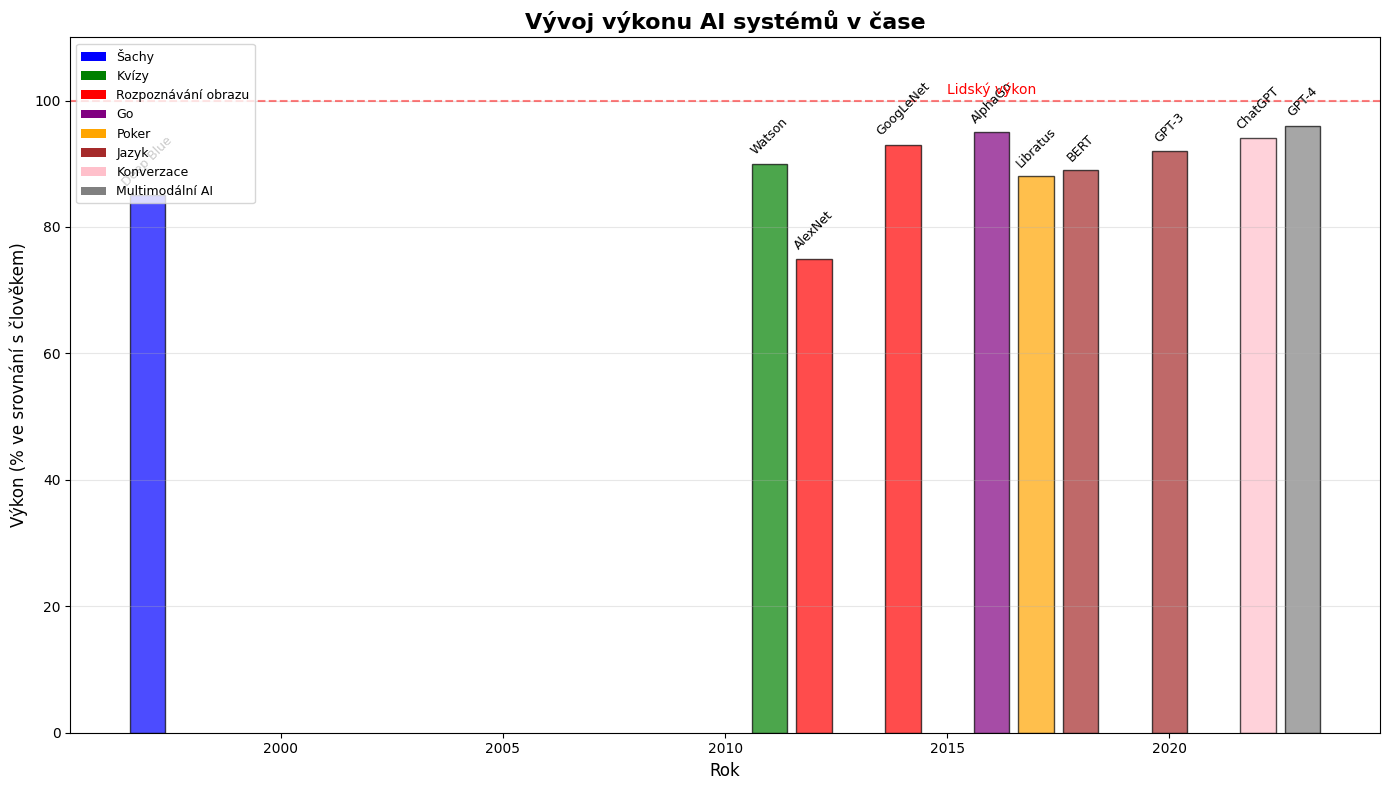


Statistiky vývoje AI:
Průměrný výkon v 90. letech: 85.0%
Průměrný výkon po roce 2010: 90.2%
Počet oblastí, kde AI překonala člověka: 0


In [5]:
# Vizualizace výkonu AI v různých oblastech
import matplotlib.pyplot as plt
import numpy as np

# Data o významných AI úspěších
milniky = [
    {"rok": 1997, "nazev": "Deep Blue", "oblast": "Šachy", "vykon": 85},
    {"rok": 2011, "nazev": "Watson", "oblast": "Kvízy", "vykon": 90},
    {"rok": 2012, "nazev": "AlexNet", "oblast": "Rozpoznávání obrazu", "vykon": 75},
    {"rok": 2014, "nazev": "GoogLeNet", "oblast": "Rozpoznávání obrazu", "vykon": 93},
    {"rok": 2016, "nazev": "AlphaGo", "oblast": "Go", "vykon": 95},
    {"rok": 2017, "nazev": "Libratus", "oblast": "Poker", "vykon": 88},
    {"rok": 2018, "nazev": "BERT", "oblast": "Jazyk", "vykon": 89},
    {"rok": 2020, "nazev": "GPT-3", "oblast": "Jazyk", "vykon": 92},
    {"rok": 2022, "nazev": "ChatGPT", "oblast": "Konverzace", "vykon": 94},
    {"rok": 2023, "nazev": "GPT-4", "oblast": "Multimodální AI", "vykon": 96}
]

# Příprava dat
roky = [m["rok"] for m in milniky]
vykony = [m["vykon"] for m in milniky]
nazvy = [m["nazev"] for m in milniky]
oblasti = [m["oblast"] for m in milniky]

# Barvy podle oblasti
barvy_oblasti = {
    "Šachy": "blue",
    "Kvízy": "green",
    "Rozpoznávání obrazu": "red",
    "Go": "purple",
    "Poker": "orange",
    "Jazyk": "brown",
    "Konverzace": "pink",
    "Multimodální AI": "gray"
}
barvy = [barvy_oblasti[oblast] for oblast in oblasti]

# Vytvoření grafu
fig, ax = plt.subplots(figsize=(14, 8))

# Sloupcový graf
bars = ax.bar(roky, vykony, color=barvy, alpha=0.7, edgecolor='black')

# Přidání popisků
for i, (bar, nazev) in enumerate(zip(bars, nazvy)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            nazev, ha='center', va='bottom', rotation=45, fontsize=9)

# Nastavení grafu
ax.set_xlabel('Rok', fontsize=12)
ax.set_ylabel('Výkon (% ve srovnání s člověkem)', fontsize=12)
ax.set_title('Vývoj výkonu AI systémů v čase', fontsize=16, fontweight='bold')
ax.set_ylim(0, 110)
ax.grid(True, axis='y', alpha=0.3)

# Přidání čáry pro lidský výkon
ax.axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Lidský výkon')
ax.text(2015, 101, 'Lidský výkon', fontsize=10, color='red')

# Legenda pro oblasti
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=oblast) 
                  for oblast, color in barvy_oblasti.items()]
ax.legend(handles=legend_elements, loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()

# Statistiky
print("\nStatistiky vývoje AI:")
print(f"Průměrný výkon v 90. letech: {np.mean([v for r, v in zip(roky, vykony) if r < 2000]):.1f}%")
print(f"Průměrný výkon po roce 2010: {np.mean([v for r, v in zip(roky, vykony) if r >= 2010]):.1f}%")
print(f"Počet oblastí, kde AI překonala člověka: {sum(1 for v in vykony if v >= 100)}")

## 7. AI v České republice

### Významné instituce:
- **ČVUT** - Fakulta elektrotechnická, katedra kybernetiky
- **UK** - Matematicko-fyzikální fakulta
- **AVČR** - Ústav informatiky
- **CIIRC** - Český institut informatiky, robotiky a kybernetiky

### České příspěvky k AI:
- Výzkum v oblasti robotiky
- Zpracování přirozeného jazyka pro češtinu
- Aplikace AI v průmyslu

## 8. Cvičení a úkoly

### Úkol 1: Časová osa
Vytvořte vlastní časovou osu s 5 nejdůležitějšími událostmi v historii AI podle vašeho názoru.

### Úkol 2: Turingův test dnes

In [6]:
# Úkol: Vylepšete Turingův test simulator
# Přidejte nové otázky a reálnější odpovědi

def muj_turing_test():
    # TODO: Přidejte alespoň 3 nové kategorie otázek
    # a reálnější odpovědi pro člověka i AI
    
    nove_otazky = {
        # Příklad:
        # "oblibene_jidlo": {
        #     "human": ["Miluju pizzu s ananasem!", "Babičkovy knedlíky jsou nejlepší."],
        #     "ai": ["Nemám schopnost jíst.", "Jako AI nemám chuťové receptory."]
        # }
    }
    
    return nove_otazky

# Test vašeho řešení
print("Implementujte funkci muj_turing_test()")

Implementujte funkci muj_turing_test()


## 9. Shrnutí

### Co jsme se naučili:
- ✅ Historie AI od starověku po současnost
- ✅ Turingův test a jeho význam
- ✅ Zlatý věk AI a první zklamání
- ✅ Expertní systémy 80. let
- ✅ Moderní průlomy v AI

### Klíčové osobnosti:
- **Alan Turing** - Turingův test, základy výpočetní teorie
- **John McCarthy** - termín "umělá inteligence", LISP
- **Marvin Minsky** - průkopník AI, neuronové sítě
- **Geoffrey Hinton** - deep learning, backpropagation

### Důležité poučení:
- AI se vyvíjí v cyklech optimismu a zklamání
- Úspěch AI závisí na: datech, výpočetním výkonu a algoritmech
- Současná AI je úzce specializovaná, ne obecná

### Příště:
V další hodině se podíváme na budoucnost AI a různé scénáře jejího vývoje.

## 10. Domácí úkol

1. **Výzkum**: Najděte informace o jednom českém vědci nebo projektu v oblasti AI a napište krátký odstavec.

2. **Analýza**: Vyberte jeden AI systém z historie (např. Deep Blue, Watson) a popište:
   - Jak fungoval
   - Jaký problém řešil
   - Proč byl významný

3. **Kreativní úkol**: Navrhněte vlastní verzi Turingova testu pro rok 2030.

4. **Programování**: Vytvořte jednoduchou časovou osu v Pythonu s vlastními AI milníky.

---

**Poznámka**: Odevzdejte úkoly před příští hodinou. Historie AI nám pomáhá pochopit současnost a předvídat budoucnost!